**Importing Dataset and Initial Sanity Check**

In [75]:
import pandas as pd

raw_df = pd.read_csv(r"C:\Users\Affan\Desktop\GitHub_Match_Maker\Github_data.csv")
# display(raw_df.head())
# display(raw_df.info())

**Selecting only the relevant features for our model**

In [76]:
selected_columns = ['user','name','topic','topic_tag','discription_text','star','fork']
new_df = raw_df[selected_columns].copy()
# new_df.head()
new_df.sample(n = 10)

,user,name,topic,topic_tag,discription_text,star,fork
422,trufflesuite,ganache-cli,GAN,[],Fast Ethereum RPC client for testing and devel...,2.8k,582
208,foundry,OpenCVSwiftStitch,Open-CV,[],Version 3 of OpenCVStitch. How to stitch image...,792,103
339,alicevision,meshroom,Computer-Vision,"['photogrammetry', 'computer-vision', '3d-reco...",3D Reconstruction Software,4.2k,419
1135,raywenderlich,swift-algorithm-club,c++,"['swift', 'data-structures', 'algorithms']","Algorithms and data structures in Swift, with ...",22.7k,3.9k
744,CarGuo,GSYGithubAPP,flutter,"['react-native', 'github', 'weex']",超完整的React Native项目，功能丰富，适合学习和日常使用。GSYGithubApp...,1.9k,349
792,flutter,flutter-intellij,flutter,"['intellij-plugin', 'java', 'flutter']",Flutter makes it easy and fast to build beauti...,1k,173
7,eriklindernoren,ML-From-Scratch,Data-Science,"['machine-learning', 'deep-learning', 'deep-re...",Machine Learning From Scratch. Bare bones NumP...,15.9k,3.1k
1310,bblanchon,ArduinoJson,Arduino,"['arduino', 'c-plus-plus', 'iot', 'embedded', ...",📟 JSON library for Arduino and embedded C++. S...,4.4k,836
1408,nisrulz,easydeviceinfo,sensor,"['android', 'easydeviceinfo', 'android-library...",📱 [Android Library] Get device information in ...,1.6k,206
1121,vuejs,vue-cli,c++,[],🛠️ Standard Tooling for Vue.js Development,25.1k,4.6k


**Formatting Semantic Features by starting off with 'topic'**

In [77]:
display(new_df['topic'].nunique())
display(new_df['topic'].unique())

15

array(['Data-Science', 'machine-Learning', 'Open-CV', 'Computer-Vision',
       'GAN', 'variational-encoder', 'Android-studio', 'flutter', 'java',
       'awesome', 'javascript', 'c++', 'Raspberry pi', 'Arduino',
       'sensor'], dtype=object)

In [78]:
new_df['topic'] = new_df['topic'].str.lower().str.strip().str.replace(' ','-')
display(new_df['topic'].unique())

array(['data-science', 'machine-learning', 'open-cv', 'computer-vision',
       'gan', 'variational-encoder', 'android-studio', 'flutter', 'java',
       'awesome', 'javascript', 'c++', 'raspberry-pi', 'arduino',
       'sensor'], dtype=object)

**Formatting 'topic_tag' feature**

In [79]:
# Initial exploration of 'topic_tag' column

display(new_df['topic_tag'].sample(n=10, random_state=72))
type(new_df['topic_tag'].iloc[0]) # should be str

991     ['human-pose-estimation', 'deep-learning', 'de...
256                                                    []
1438                                                   []
1285                                                   []
1308    ['golang', 'microcontroller', 'tinygo', 'llvm'...
572                                                    []
154     ['chatterbot', 'machine-learning', 'chatbot', ...
144     ['pytorch', 'pytorch-tutorials', 'pytorch-hand...
1414                                                   []
533                                                    []
Name: topic_tag, dtype: object

str

In [80]:
# convert 'topic_tag' strings to lists using ast.literal_eval

import ast
new_df['topic_tag'] = new_df['topic_tag'].apply(ast.literal_eval)

In [81]:
# Clean and standardize tags in 'topic_tag' column and remove duplicates

new_df['topic_tag'] = new_df['topic_tag'].apply(
    lambda tags: list(dict.fromkeys([t.lower().strip().replace(' ','-') for t in tags]))
    )

# Fill empty 'topic_tag' lists with corresponding 'topic' value

for i, tags in new_df['topic_tag'].items():
    if len(tags) == 0:
        new_df.at[i, 'topic_tag'] = [new_df.at[i, 'topic']]

new_df['topic_tag'].sample(n=10, random_state=84)


78      [deep-learning, neural-network, machine-learni...
1477                                             [sensor]
87                      [book, bookdown, data-science, r]
1363                        [enc28j60, arduino, ethernet]
541                                 [variational-encoder]
1034    [freecodecamp, cn-freecodecamp, nodejs, educat...
1375                                            [arduino]
660     [android, kotlin, livedata, lifecycleowner, an...
132     [python, jupyter, jupyter-notebook, machine-le...
160     [seam-carving, image-processing, image-resize,...
Name: topic_tag, dtype: object

**Cleaning 'discription_text' feature**

In [82]:
# Count missing values in 'discription_text' column
new_df['discription_text'].isna().sum()

# Fill missing 'discription_text' with empty strings
new_df['discription_text'] = new_df['discription_text'].fillna('')

new_df['discription_text'].sample(n = 10, random_state = 91)

322     MediaPipe is a cross-platform framework for bu...
134     Essential Cheat Sheets for deep learning and m...
253                                                      
675     TestFairy plugin for Gradle / Android Studio (...
212     A project for porting and optimizing OpenCV fo...
1040          ⚡ Delightful Node.js packages and resources
1115    simple css to make select2 widgets fit in with...
465                       Awesome GAN for Medical Imaging
1498    A sensor dashboard for Android plotting all se...
851     An iOS/OSX bridge for sending messages between...
Name: discription_text, dtype: object

In [83]:
# Remove emojis from 'discription_text'
import re

emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags
    u"\u2600-\u26FF"          # misc symbols (⚡, ☀, ★ etc.)
"]+", flags=re.UNICODE)

new_df['discription_text'] = new_df['discription_text'].apply(
    lambda text: emoji_pattern.sub("", text)
)

# -----------------------------------------------------------------------------------------------

# Remove URLs from 'discription_text'
import re

url_pattern = re.compile(r'http[s]?://\S+')
new_df['discription_text'] = new_df['discription_text'].apply(
    lambda text: url_pattern.sub("", text)
)

# -----------------------------------------------------------------------------------------------

# Remove non-ASCII characters (mojibake and corrupted unicode)
new_df['discription_text'] = new_df['discription_text'].apply(
    lambda text: re.sub(r'[^\x00-\x7F]+', ' ', text)
)
new_df['discription_text'] = new_df['discription_text'].str.replace(r'\s+', ' ', regex=True).str.strip()

# -----------------------------------------------------------------------------------------------

# Standardize 'discription_text' by converting to lowercase and stripping whitespace
new_df['discription_text'] = new_df['discription_text'].str.lower().str.strip()


new_df['discription_text'].sample(n = 10, random_state = 91)


322     mediapipe is a cross-platform framework for bu...
134     essential cheat sheets for deep learning and m...
253                                                      
675     testfairy plugin for gradle / android studio (...
212     a project for porting and optimizing opencv fo...
1040            delightful node.js packages and resources
1115    simple css to make select2 widgets fit in with...
465                       awesome gan for medical imaging
1498    a sensor dashboard for android plotting all se...
851     an ios/osx bridge for sending messages between...
Name: discription_text, dtype: object

**Combining 'topic' and 'topic_tag' to create a single new 'repo_tag' feature**

In [84]:
new_df['repo_tag'] = new_df.apply(
    lambda row: list(dict.fromkeys([row['topic']] + row['topic_tag'])),
    axis = 1
)

In [85]:
new_df.to_csv(r"C:\Users\Affan\Desktop\GitHub_Match_Maker\Cleaned_Semantic_data.csv", index=False)

**Formatting Numerical Features now. Starting with converting 'star' and 'fork' to actually be numerical using custom function**

In [86]:
# Function to clean numbers with 'k' suffix
def clean_numbers(s):
    s = str(s).strip()
    if s.lower().endswith('k'):
        num = float(s[:-1])
        return int(num * 1000)
    else:
        return int(float(s))

# Test cases
# print(clean_numbers(39743))
# print(clean_numbers('39.7k'))
# print(clean_numbers('512'))

# Applying the function to 'star' and 'fork' columns
new_df['star'] = new_df['star'].apply(clean_numbers)
new_df['fork'] = new_df['fork'].apply(clean_numbers)
new_df.sample(n = 8, random_state=41)

,user,name,topic,topic_tag,discription_text,star,fork,repo_tag
1281,jperkin,node-rpio,raspberry-pi,[raspberry-pi],raspberry pi gpio library for node.js,669,89,[raspberry-pi]
1112,neror,CA360,c++,[c++],core animation ios example code. lots of it.,740,123,[c++]
1095,dcloudio,uni-app,javascript,"[uni-app, vue, mpvue, miniprogram, javascript,...",uni-app vue h5 app,20600,1800,"[javascript, uni-app, vue, mpvue, miniprogram,..."
522,yiyang92,vae_captioning,variational-encoder,"[vae, captioning-images, tensorflow, machine-l...",implementation of diverse and accurate image d...,52,8,"[variational-encoder, vae, captioning-images, ..."
1179,Carthage,Carthage,c++,"[cocoa, carthage, swift, package-manager]","a simple, decentralized dependency manager for...",13700,1400,"[c++, cocoa, carthage, swift, package-manager]"
716,nisrulz,flutter-examples,flutter,"[dartlang, dart, android, ios, flutter, applic...","[examples] simple basic isolated apps, for bud...",4600,1200,"[flutter, dartlang, dart, android, ios, applic..."
1355,ecto,duino,arduino,[arduino],arduino framework for node.js,951,233,[arduino]
1294,mcdona1d,RaspberryWechatPi,raspberry-pi,[raspberry-pi],,597,196,[raspberry-pi]


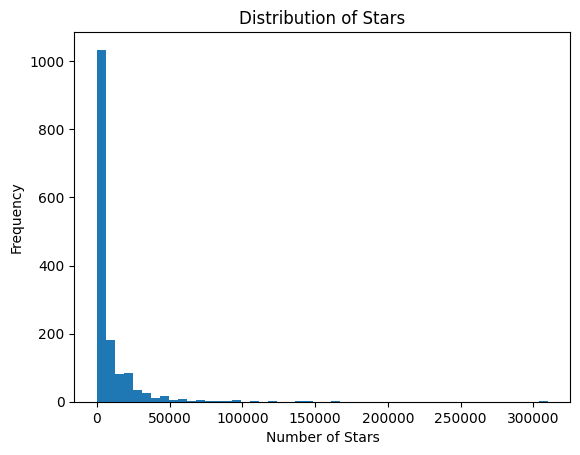

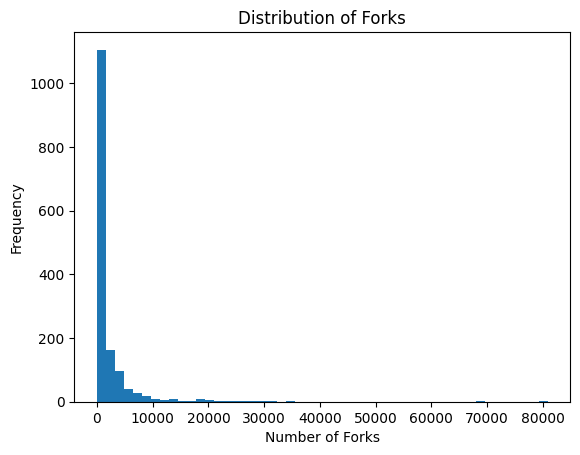

In [87]:
# Visualizing the distribution of 'star' and 'fork' columns

import matplotlib.pyplot as plt

plt.hist(new_df['star'], bins=50)
plt.title('Distribution of Stars')
plt.xlabel('Number of Stars')
plt.ylabel('Frequency')
plt.show()

plt.hist(new_df['fork'], bins=50)
plt.title('Distribution of Forks')
plt.xlabel('Number of Forks')
plt.ylabel('Frequency')
plt.show()


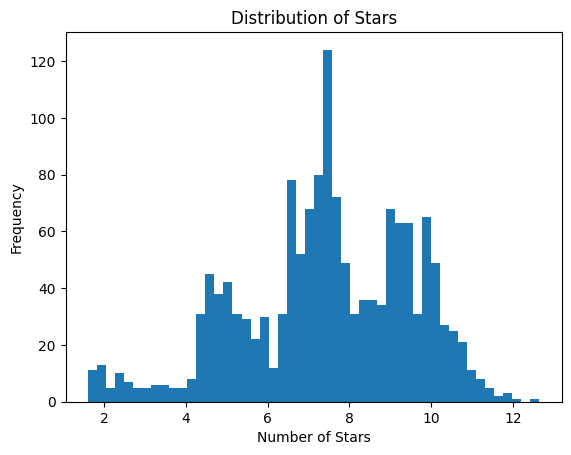

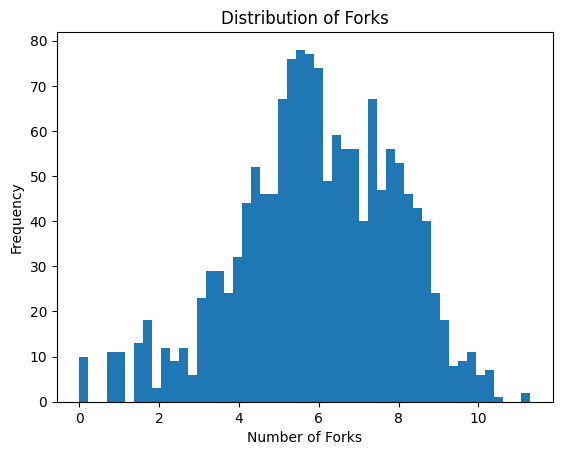

In [88]:
# Log-transforming 'star' and 'fork' columns
import numpy as np

new_df['star_log'] = np.log1p(new_df['star'])
new_df['fork_log'] = np.log1p(new_df['fork'])

plt.hist(new_df['star_log'], bins=50)
plt.title('Distribution of Stars')
plt.xlabel('Number of Stars')
plt.ylabel('Frequency')
plt.show()

plt.hist(new_df['fork_log'], bins=50)
plt.title('Distribution of Forks')
plt.xlabel('Number of Forks')
plt.ylabel('Frequency')
plt.show()



**Shifting Repo level features to Dev level features by creating a new dataframe. This is the dataframe which will be fed to our pipline**

<Axes: >

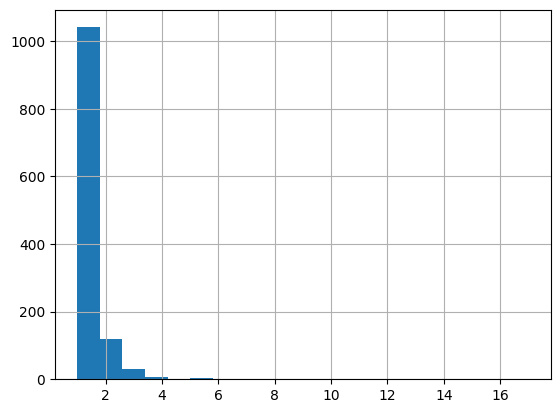

In [89]:
new_df['user'].value_counts().hist(bins=20)

In [90]:
new_df.columns

Index(['user', 'name', 'topic', 'topic_tag', 'discription_text', 'star',
       'fork', 'repo_tag', 'star_log', 'fork_log'],
      dtype='object')

**Creating the aggregated description text per developer**

In [91]:
# Below line will collect all repo descriptions for per individual developer and merges them into one single text, which will later be vectorized.
developer_desc = new_df.groupby('user')['discription_text'].apply(lambda texts: " ".join(texts))

# developer_desc is the first feature of our new dataframe for developer profiles.
developer_desc.head()

user
0xFireball                        rooting the android studio avds
1technophile    mqtt gateway for esp8266, esp32, sonoff rf bri...
1zlab           opencv, 1z make things easy , opencv -1z . ope...
256dpi                                   mqtt library for arduino
2d-inc          flutter launch timeline demo load and get full...
Name: discription_text, dtype: object

**Creating the aggregated tags per developer**

In [92]:
# Collect all unique tags per developer into a list.
# "tag for sublist in lists for tag in sublist" flattens the list of lists into a single list before removing duplicates.
developer_tags = new_df.groupby('user')['repo_tag'].apply(lambda lists: list(dict.fromkeys(tag for sublist in lists for tag in sublist)))

# Second feature of our developer profiles dataframe
developer_tags.head()

user
0xFireball                                       [android-studio]
1technophile    [arduino, mqtt, gateway, openhab2, home-automa...
1zlab                                                   [open-cv]
256dpi                                       [arduino, mqtt, iot]
2d-inc                                                  [flutter]
Name: repo_tag, dtype: object

**Aggregate Numeric Features**

In [93]:
# Aggregate numeric features per developer.

developer_numeric = new_df.groupby('user').agg(
    star_log_mean = ('star_log', 'mean'),
    fork_log_mean = ('fork_log', 'mean'),
    repo_count = ('name', 'count')
)

# Third feature of our developer profiles dataframe
developer_numeric.head()

,star_log_mean,fork_log_mean,repo_count
user,,,
0xFireball,4.510860,2.890372,1
1technophile,7.378384,5.826000,1
1zlab,4.382027,3.218876,1
256dpi,6.369901,5.075174,1
2d-inc,8.028466,6.176247,2


**Creating the new DataFrame**

In [94]:
dev_df = (
    developer_desc.to_frame(name = "dev_description")
    .join(developer_tags.to_frame(name = "dev_tags"))
    .join(developer_numeric)
)

dev_df.head()

,dev_description,dev_tags,star_log_mean,fork_log_mean,repo_count
user,,,,,
0xFireball,rooting the android studio avds,[android-studio],4.510860,2.890372,1
1technophile,"mqtt gateway for esp8266, esp32, sonoff rf bri...","[arduino, mqtt, gateway, openhab2, home-automa...",7.378384,5.826000,1
1zlab,"opencv, 1z make things easy , opencv -1z . ope...",[open-cv],4.382027,3.218876,1
256dpi,mqtt library for arduino,"[arduino, mqtt, iot]",6.369901,5.075174,1
2d-inc,flutter launch timeline demo load and get full...,[flutter],8.028466,6.176247,2


In [95]:
dev_df.to_csv(r"C:\Users\Affan\Desktop\GitHub_Match_Maker\Developer_Profiles.csv")
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 0xFireball to zziz
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dev_description  1210 non-null   object 
 1   dev_tags         1210 non-null   object 
 2   star_log_mean    1210 non-null   float64
 3   fork_log_mean    1210 non-null   float64
 4   repo_count       1210 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 56.7+ KB


In [96]:
print(f"Number of Developers are: {len(dev_df)}")
print("-" * 50)
print(dev_df['dev_description'].str.len().describe())
print("-" * 50)
print(dev_df['dev_tags'].apply(len).describe())

Number of Developers are: 1210
--------------------------------------------------
count    1210.000000
mean       91.905785
std       101.430991
min         0.000000
25%        44.000000
50%        67.000000
75%       106.000000
max      1503.000000
Name: dev_description, dtype: float64
--------------------------------------------------
count    1210.000000
mean        6.810744
std         7.300003
min         1.000000
25%         1.000000
50%         5.000000
75%        10.000000
max       121.000000
Name: dev_tags, dtype: float64


**Creation of the data frame that will be passed to the model**

In [97]:
model_df = dev_df[['dev_description', 'dev_tags', 'star_log_mean', 'fork_log_mean']]
model_df.head()

,dev_description,dev_tags,star_log_mean,fork_log_mean
user,,,,
0xFireball,rooting the android studio avds,[android-studio],4.510860,2.890372
1technophile,"mqtt gateway for esp8266, esp32, sonoff rf bri...","[arduino, mqtt, gateway, openhab2, home-automa...",7.378384,5.826000
1zlab,"opencv, 1z make things easy , opencv -1z . ope...",[open-cv],4.382027,3.218876
256dpi,mqtt library for arduino,"[arduino, mqtt, iot]",6.369901,5.075174
2d-inc,flutter launch timeline demo load and get full...,[flutter],8.028466,6.176247


In [99]:
# Count of unique tags across all developers
all_tags = [tag for tags in dev_df['dev_tags'] for tag in tags]
len(set(all_tags)) # Output: 3290

# 3290 means we can apply techniques like one-hot encoding or multi-label binarization for tag representation in our model.
# We choose to use multi-label binarization for better scalability.

3290

In [101]:
print(type(model_df['dev_tags'].iloc[0])) # should be list


<class 'list'>


We will be using 3 transformers:

TF-IDF → for description text

MultiLabelBinarizer → for tags

MinMaxScaler → for numeric features

In [105]:
# Initializing tfidf transformer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=800, min_df=2)


In [106]:
# Initializing MLB transformer wrapped inside a FunctionTransformer

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import FunctionTransformer

mlb = MultiLabelBinarizer()

def transform_tags(tag_list):
    return mlb.fit_transform(tag_list)

tag_transformer = FunctionTransformer(transform_tags, validate=False)

In [107]:
# Initalizing MinMaxScaler for numeric features

from sklearn.preprocessing import MinMaxScaler

num_scaler = MinMaxScaler()

In [109]:
# Creating the ColumnTransformer to combine all feature transformations

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers = [
        ('text', tfidf, 'dev_description'),
        ('tags', tag_transformer, 'dev_tags'),
        ('num', num_scaler, ['star_log_mean','fork_log_mean'])
    ],
    sparse_threshold = 0.3
)

In [111]:
# Initialize the KNN model

from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(
    n_neighbors = 6,
    metric = 'cosine'
)

In [112]:
# Build the full pipeline

from sklearn.pipeline import Pipeline

model = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', knn)
])

In [115]:
# Vizualizing the pipeline structure

from sklearn import set_config

set_config(display='diagram')

model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('knn', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('text', ...), ('tags', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme